In [1]:
import torch
import sys
import os

# Get the absolute path to the project root & add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from pde_class import Pde
from simple_pinn import PINN
from helper_functions import gradient, plot_loss, getData


iteration 0 resloss 4.21e+00
iteration 0 derivloss 8.11e+09
tensor(0.) tensor(1.4219)
tensor(-9887.1230)


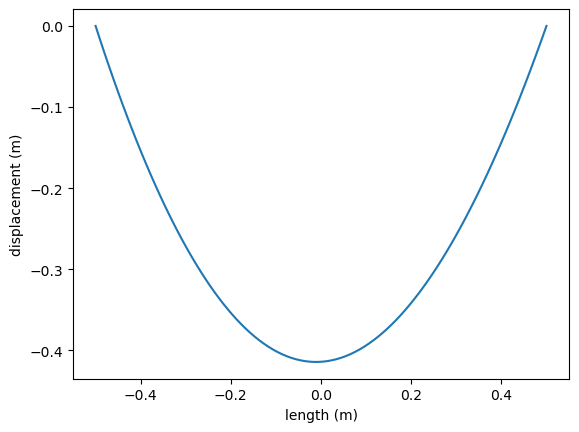

iteration 1000 resloss 1.90e+00
iteration 1000 derivloss 5.14e+03
tensor(0.) tensor(1.4219)
tensor(-10000.7627)


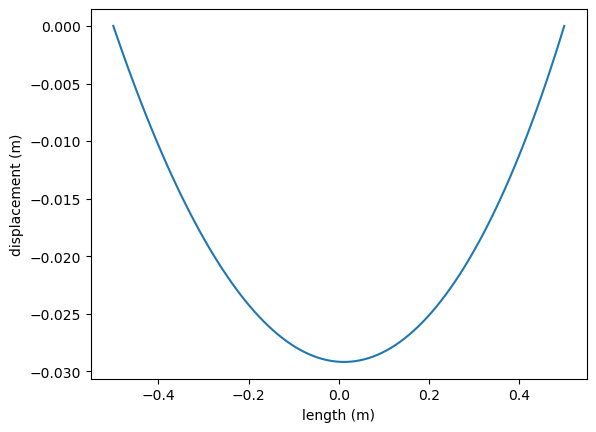

iteration 2000 resloss 1.46e+00
iteration 2000 derivloss 3.98e+03
tensor(0.) tensor(1.4219)
tensor(-10001.5420)


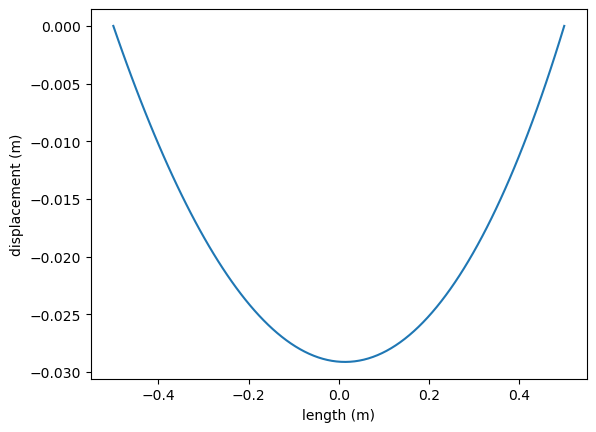

iteration 3000 resloss 1.34e+00
iteration 3000 derivloss 2.79e+03
tensor(0.) tensor(1.4219)
tensor(-10001.6641)


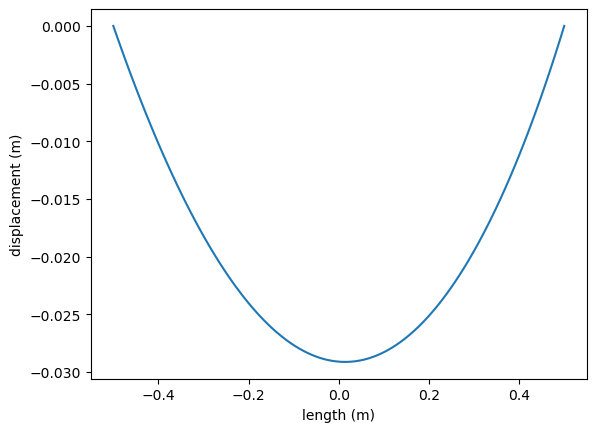

iteration 4000 resloss 1.30e+00
iteration 4000 derivloss 1.59e+03
tensor(0.) tensor(1.4219)
tensor(-10001.8242)


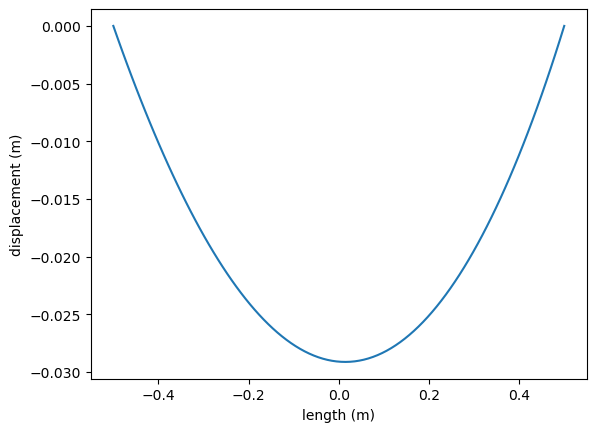

iteration 5000 resloss 1.27e+00
iteration 5000 derivloss 6.78e+02
tensor(0.) tensor(1.4219)
tensor(-10002.0098)


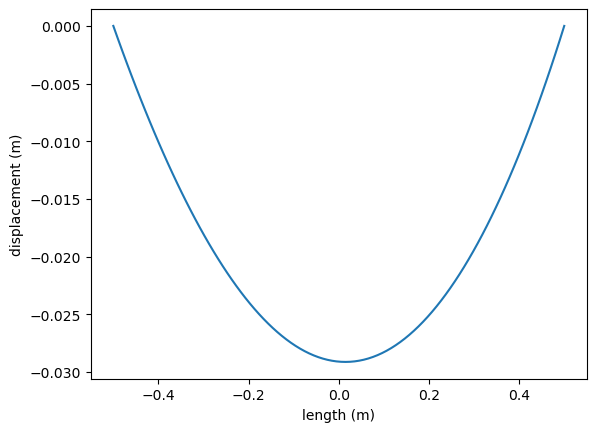

iteration 6000 resloss 1.24e+00
iteration 6000 derivloss 1.93e+02
tensor(0.) tensor(1.4219)
tensor(-10002.1904)


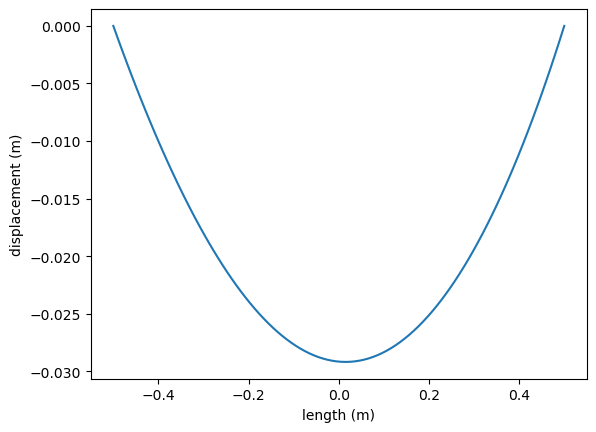

KeyboardInterrupt: 

In [2]:
pde = Pde(E=1e8, nu=0.3, h=0.001, k=5/6, l=1.0, q = 1.0)
model = PINN([1, 20, 20, 20, 4], lr=0.5e-3)

iterations = 100001
report_step = 1000
rel_diff = 100.0
for i in range(iterations):
      model.optimizer.zero_grad()

      # Generate N points
      x = getData(num_points=10, grad=True)
      resloss, derivloss = pde.getLoss(model, x)

      loss = resloss + derivloss
      loss.backward()

      model.optimizer.step()

      with torch.no_grad():
          if i % report_step ==0:
              print(f"iteration {i} resloss {resloss.item():.2e}")
              print(f"iteration {i} derivloss {derivloss.item():.2e}")
              plot_loss(model=model, eq=pde)
              print